# Machine Learning - CSC 74020 Homework Assignment One
## Zoe Markovits 

#### Importing Datasets

In [1]:
import numpy as np
import pandas as pd
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 75)
%matplotlib inline

In [2]:
train_df = pd.read_csv('/Users/zoemarkovits/Documents/Grad School/Spring 2019/Machine Learning/HW 1/optdigits.tra', header=None)
test_df = pd.read_csv('/Users/zoemarkovits/Documents/Grad School/Spring 2019/Machine Learning/HW 1/optdigits.tes', header=None)

In [3]:
print(train_df.shape)
train_df.head()

(3823, 65)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,16,6,6,10,0,0,0,8,16,2,0,11,2,0,0,5,16,3,0,5,7,0,0,7,13,3,0,8,7,0,0,4,12,0,1,13,5,0,0,0,14,9,15,9,0,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,16,8,16,5,0,0,0,11,16,0,6,14,3,0,0,12,12,0,0,11,11,0,0,12,12,0,0,8,12,0,0,7,15,1,0,13,11,0,0,0,16,8,10,15,3,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,11,9,11,16,1,0,0,0,0,0,7,14,0,0,0,0,3,4,14,12,2,0,0,1,16,16,16,16,10,0,0,2,12,16,10,0,0,0,0,0,2,16,4,0,0,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,5,16,11,13,7,0,0,3,15,8,1,15,6,0,0,11,16,16,16,16,10,0,0,1,4,4,13,10,2,0,0,0,0,0,15,4,0,0,0,0,0,3,16,0,0,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,13,8,0,0,0,0,0,3,14,4,0,0,0,0,0,6,16,14,9,2,0,0,0,4,16,3,4,11,2,0,0,0,14,3,0,4,11,0,0,0,10,8,4,11,12,0,0,0,4,12,14,7,0,0,6


In [4]:
print(test_df.shape)
test_df.head()

(1797, 65)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,0,0,5,13,9,1,0,0,0,0,13,15,10,15,5,0,0,3,15,2,0,11,8,0,0,4,12,0,0,8,8,0,0,5,8,0,0,9,8,0,0,4,11,0,1,12,7,0,0,2,14,5,10,12,0,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,0,11,16,9,0,0,0,0,3,15,16,6,0,0,0,7,15,16,16,2,0,0,0,0,1,16,16,3,0,0,0,0,1,16,16,6,0,0,0,0,1,16,16,6,0,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,3,16,15,14,0,0,0,0,8,13,8,16,0,0,0,0,1,6,15,11,0,0,0,1,8,13,15,1,0,0,0,9,16,16,5,0,0,0,0,3,13,16,16,11,5,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,13,6,15,4,0,0,0,2,1,13,13,0,0,0,0,0,2,15,11,1,0,0,0,0,0,1,12,12,1,0,0,0,0,0,1,10,8,0,0,0,8,4,5,14,9,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,0,7,8,0,0,0,0,0,1,13,6,2,2,0,0,0,7,15,0,9,8,0,0,5,16,10,0,16,6,0,0,4,15,16,13,16,1,0,0,0,0,3,15,10,0,0,0,0,0,2,16,4,0,0,4


In [5]:
train_df.columns = train_df.columns.astype(str)
test_df.columns = test_df.columns.astype(str)

In [6]:
"""Checking for imbalanced classes"""

print ('Training data class counts:\n', train_df['64'].value_counts())
print ('Testing data class counts:\n', test_df['64'].value_counts())

Training data class counts:
 3    389
1    389
7    387
4    387
9    382
8    380
2    380
6    377
5    376
0    376
Name: 64, dtype: int64
Testing data class counts:
 3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
Name: 64, dtype: int64


#### Implementation

Our implementation consists of two classes, a node class and a decision tree class. Our node class creates the methodology needed to implement a decision tree, and our decision tree class builds and runs that tree.

We start by building our node class in order to create a “parent” object that can keep track of its “children”.

In [7]:
class Node:
    def __init__(self, df, parent = 'root'):
        self.df = df
        if parent == 'root': 
            self.parent = None
            self.depth = 0
            self.split_column = None
            self.split_threshold = None
            self.child_left = None
            self.child_right = None
        else: 
            self.parent = parent
            self.depth = parent.depth + 1
            self.split_column = None
            self.split_threshold = None
            self.child_left = None
            self.child_right = None
    
    """This function returns the class probabilities"""
    def class_probabilities(self):
        class_probabilities = []
        if isinstance(self.df, pd.core.series.Series):
            class_probabilities.append(1)
        else:
            row_count = len(self.df.index)
            for i in self.df.iloc[:,-1].unique():
                class_count = sum(self.df.iloc[:, -1] == i)
                class_probabilities.append(class_count / row_count)
        return class_probabilities
    
    """This function finds the entropy of a node"""
    def entropy(self):
        entropy_value = 0
        for i in self.class_probabilities():
            if i == 0:
                entropy_value += 0
            else:
                entropy_value += -i * np.log2(i)
        return entropy_value
    
    """This function determines if a node is a leaf by setting a default depth limit, 
    a default probability limit, and a default minimum size"""
    def check_leaf(self, max_depth = 4, min_probability = .95, min_size = 20):
        if (len(self.df.index) <= min_size or max(self.class_probabilities()) >=\
            min_probability or self.depth >= max_depth):
            return True
        else:
            return False
    
    """This function gets the value of a leaf"""
    def leaf_value(self):
        return self.df.iloc[:, -1].mode()[0]
    
    """This function splits the dataframe on a threshold value of 4"""
    def split_dataframe(self, column, threshold = 4):
        return [ self.df.loc[self.df[column] <= threshold].drop(column, axis = 1), 
                 self.df.loc[self.df[column] > threshold].drop(column, axis = 1) ]
    
    """This function stops a leaf from generating a new child, and splits the dataframe using our default threshold 
    and returns a list of child nodes"""
    def make_child_nodes(self, column = 'optimize' , threshold = 4, max_depth = 10):
        if self.check_leaf(max_depth = max_depth):
            print('Warning: Making child of leaf.')
            
        if column == 'optimize':
            column = self.get_max_info_gain_column(threshold = threshold)
        
        split = self.split_dataframe(column, threshold)
        self.split_column = column
        self.split_threshold = threshold
        self.left_child = Node(split[0], parent = self)
        self.right_child = Node(split[1], parent = self)
        return [self.left_child, self.right_child]
 
    """This function computes the information gain by getting the entropy of a feature and the entropy of an entire 
    node, and finds the weighted average and returns the difference"""
    def info_gain(self, column, threshold = 4):
        row_count = len(self.df.index)
        old_entropy = self.entropy()
        new_entropy = 0
        
        for node in self.make_child_nodes(column, threshold):
            proportion = len(node.df.index) / row_count
            new_entropy += proportion * node.entropy()
    
        return old_entropy - new_entropy
    
    """This function creates a dictionary with information gain as its keys and column names as its values and 
    returns the column name with the maximum information gain"""
    def get_max_info_gain_column(self, threshold = 4):
        split_options = {}
        for column_name in self.df.columns.values[:-1]:
            split_options[self.info_gain(column = column_name, threshold = threshold)] = column_name
        return split_options[max(split_options.keys())]

Next we create our decision tree class to construct and recursively build a decision tree.

In [8]:
class DecisionTree:
    def __init__(self, root_data_frame, max_depth):
        self.root_node = Node(root_data_frame)
        self.max_depth = max_depth
        self.nodes = [self.root_node]
        self.build_queue = []
        
    """This function recursively builds our tree """
    def fit(self, current_node = None, threshold = 4):
        if current_node == None:
            current_node = self.root_node
        else:
            pass
        
        if current_node.check_leaf(max_depth = self.max_depth):
            pass
        else: 
            children = current_node.make_child_nodes(threshold = threshold)
            for child in children:
                self.nodes.append(child)
                self.build_queue.append(child)
        
        if len(self.build_queue) == 0:
            print('Finished building')
        else:
            current_node = self.build_queue.pop(0)
            return self.fit(current_node = current_node, threshold = threshold)
         
    """This function makes class predictions for a given input vector by moving down the tree"""
    def predictor(self, vector, current_node = None):
        if current_node == None:
            current_node = self.root_node
        else:
            pass
        
        if current_node.check_leaf(max_depth = self.max_depth):
            return current_node.leaf_value()
        else:
            if vector[current_node.split_column] <= current_node.split_threshold:
                return self.predictor(vector, current_node = current_node.left_child)
            else:
                return self.predictor(vector, current_node = current_node.right_child)
    
    """This function creates a predicton for a given dataframe by making a prediction for each row"""
    def predict(self, dataframe):
        predictions_list = []
        for index, row in dataframe.iterrows():
            predictions_list.append(self.predictor(row))
        return pd.Series(predictions_list)
          
    """This function scores the tree and returns a list with an accuracy table, an accuracy score, and an error rate"""
    def score(self, test_dataframe):
        predictions = self.predict(test_dataframe)
        labels = test_dataframe.iloc[:,-1]
        accuracy = sum(predictions == labels)/len(predictions)
        label_dict = {i:[] for i in range(10)}
        for i in range(10):
            predicted_i = len(predictions[predictions == i])
            true_positives = sum(labels[predictions == i] == i)
            false_positives = predicted_i - true_positives
            label_dict[i] = [predicted_i, true_positives, false_positives]
        cols = ['Test Cases', 'True', 'False']
        score_df = pd.DataFrame.from_dict(label_dict, orient = 'index', columns = cols)
        err_rate = sum(score_df['False'])/sum(score_df['Test Cases'])
        return [score_df, accuracy, err_rate]

Finally we write printer functions that give us the results of our decision tree after putting constraints on depth and sample size. We also have a function that outputs the results of these runs into a script file.

In [9]:
"""This function gives us the error rate of our tree"""
def print_error(score_df, err_rate, percent_train, max_depth, file):
    pprint.pprint('Run with ' + str(percent_train  *100) + '% ' 
                + 'of training set ' + 'and max depth = ' + str(max_depth), file)
    pprint.pprint(score_df, file)
    pprint.pprint('Error Rate: ' + str(round(err_rate,2)), file)

In [10]:
"""This function gives us the accuracy score of our tree"""
def print_accuracy(score_df, run_number, accuracy, percent_train, 
                   max_depth, file):
    pprint.pprint('Run number ' + str(run_number) + ' of 3 for ' 
                + str(percent_train * 100) + '% of data.', file)
    pprint.pprint('Run with ' + str(percent_train  *100) + '% ' 
                + 'of training set ' + 'and max depth = ' + str(max_depth), file)
    pprint.pprint(score_df, file)
    pprint.pprint('Accuracy: ' + str(round(accuracy,2)), file)

In [11]:
"""This function returns a script file that prints out the accuracy and
error rates of our tree based on the various max depths and sample 
sizes"""
def script_printer():

    script = open("SCRIPT.txt","w+")

    for i in [3, 4, 6]:
        decisiontree = DecisionTree(train_df, max_depth = i)
        decisiontree.fit()
        score_info = decisiontree.score(test_df)
        score_df = score_info[0]
        err_rate = score_info[2]
        print_error(score_df, err_rate, 1, i, script)

    sample_props = [.1, .2, .5, .8, 1]
    for i in sample_props:
        trials = []
        for j in range(1,4):
            decisiontree = DecisionTree(train_df.sample(frac=i), max_depth = 6)
            decisiontree.fit()
            score_info = decisiontree.score(test_df)
            score_df = score_info[0]
            accuracy = score_info[1]
            trials.append(accuracy)
            print_accuracy(score_df, j, accuracy, i, 6, script)
        pprint.pprint('Mean accuracy over 3 trials for sample size ' + str(i) + 
                 ' = ' + str(np.mean(trials)), script)

    script.close()

In [12]:
"""This function plots the accuracy by proportion of our training 
examples used"""
def accuracy_proportion_plot():
    sample_props = [.1, .2, .5, .8, 1]
    accuracy_vals = []
    for i in sample_props:
        trials = []
        for j in range(3):
            decisiontree = DecisionTree(train_df.sample(frac=i), max_depth = 6)
            decisiontree.fit()
            score_info = decisiontree.score(test_df)
            accuracy = score_info[1]
            trials.append(accuracy)
        accuracy_vals.append(np.mean(trials))

    training_examples_accuracy = dict(zip(sample_props, accuracy_vals))
    
    plt.scatter(training_examples_accuracy.keys(), training_examples_accuracy.values())
    plt.xlabel('Sample Proportion')
    plt.ylabel('Accuracy')
    plt.savefig('training_examples_accuracy.png')

In [13]:
"""This function plots the accuracy by max depth"""
def accuracy_depth_plot():
    depths = [3,4,5,6,7,8]
    accuracy_vals = []
    for i in depths:
        decisiontree = DecisionTree(train_df, max_depth = i)
        decisiontree.fit()
        score_info = decisiontree.score(test_df)
        accuracy = score_info[1]
        accuracy_vals.append(accuracy)

    training_examples_accuracy = dict(zip(depths, accuracy_vals))
    
    plt.scatter(training_examples_accuracy.keys(), training_examples_accuracy.values())
    plt.xlabel('Max Depth')
    plt.ylabel('Accuracy')
    plt.savefig('training_examples_accuracy.png')

In [14]:
script_printer()

Finished building
Finished building
Finished building
Finished building
Finished building
Finished building
Finished building
Finished building
Finished building
Finished building
Finished building
Finished building
Finished building
Finished building
Finished building
Finished building
Finished building
Finished building


Finished building
Finished building
Finished building
Finished building
Finished building
Finished building
Finished building
Finished building
Finished building
Finished building
Finished building
Finished building
Finished building
Finished building
Finished building


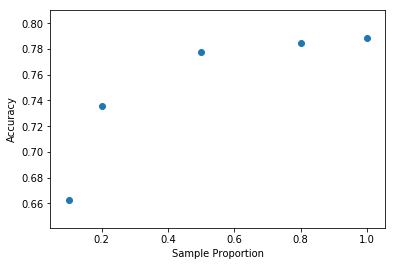

In [15]:
accuracy_proportion_plot()

Finished building
Finished building
Finished building
Finished building
Finished building
Finished building


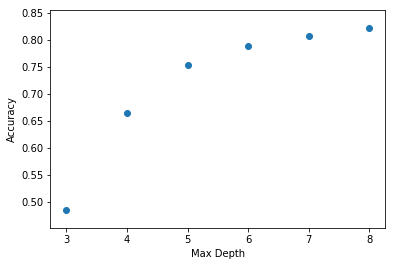

In [16]:
accuracy_depth_plot()